# Linear Regression

- Sin 그래프를 이용해서 Linear Regression을 sklearn library를 이용해서 수정해보자

# Import Library

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare Simple Dataset

In [15]:
print(np.pi)

3.141592653589793


In [16]:
# true data

N = 100

# linesapce = 선형 구간 혹은 로그 구간을 지정한 구간의 수만큼 분할
# 시작, 끝(포함), 갯수
# reshape = 기존 데이터는 유지하고 차원과 형상을 바꿈
# ex) 3개의 행과 4개의 열로 구성된 배열을 재설정하고 싶으면 reshape(3,4)
# reshape(N,1) = N개 행, 1개 열

# x 값은 0 ~ 2*pi 이고
# y 값은 -1 ~ 1 사이의 값

X = np.linspace(0, 2*np.pi, N).reshape(N,1) # 0에서 2pi 사이의 값을 균등하게 100개로 분할
X[:5]

array([[0.        ],
       [0.06346652],
       [0.12693304],
       [0.19039955],
       [0.25386607]])

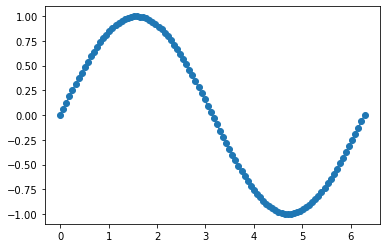

In [17]:
# plot 그리기

y = np.sin(X)
plt.plot(X,y)
plt.scatter(X,y)

Noise 만들어주기

- rand(0과 1 사이의 난수를 발생시키는) 명령어를 사용

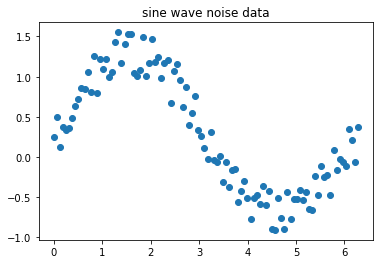

In [20]:
np.random.seed(1)
y += 0.3*np.random.rand(N,1)

plt.scatter(X,y)
plt.title('sine wave  data')
plt.show()

Shuffle Dataset

In [22]:
# shuffle data
np.random.seed(10)

# N은 1~100까지의 수를 섞어준다
idx = np.random.permutation(N)

In [23]:
shuffle_X = X[idx]
shuffle_y = y[idx]

Split train&test(3:1의 비율)

In [24]:
n = int(N*(3/4))

# train_data
X_train = shuffle_X[:n]
y_train = shuffle_y[:n]

In [25]:
# test_data
X_test = shuffle_X[n:]
y_test = shuffle_y[n:]

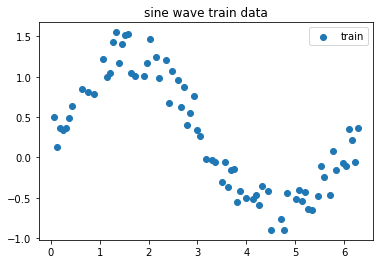

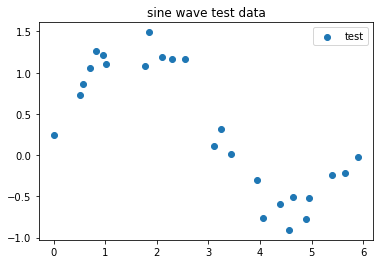

In [26]:
#plot
plt.scatter(X_train, y_train, label='train')
plt.legend()
plt.title('sine wave train data')
plt.show()

plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.title('sine wave test data')
plt.show()

# Perform Linear Regression

 - compute W using sklearn library

In [27]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

print(reg.intercept_)
print(reg.coef_)

[1.12584664]
[[-0.26325438]]


## X data를 이용해서 Prediction을 하기 위해서는 .predict를 이용

In [28]:
Pred = reg.predict(X_train)

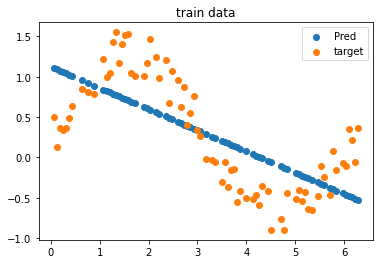

In [29]:
plt.figure()
plt.scatter(X_train, Pred, label='Pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

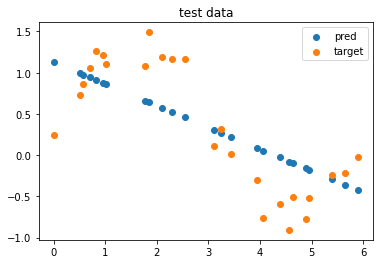

In [30]:
plt.figure()
plt.scatter(X_test, reg.predict(X_test), label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

# Practice

- Another Dataset
- 임의의 function을 지정한 후 linear regression을 수행

y = 2x+5

In [32]:
X = 3 * np.random.rand(100,1) # shape => (100,1)
y = 2*X+5

# add_noise
y_noise = y + np.random.rand(100,1) # nosie data를 가진 y 값

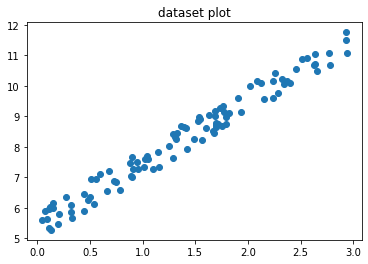

In [33]:
plt.scatter(X, y_noise)
plt.title('dataset plot')
plt.show()

In [40]:
reg = LinearRegression()
reg.fit(X,y_noise)

print(reg.intercept_)
print(reg.coef_)

[5.46443632]
[[2.027286]]


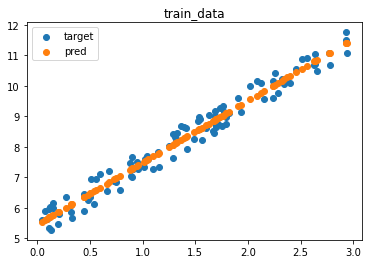

In [43]:
plt.figure()
plt.scatter(X, y_noise, label='target')
plt.scatter(X, reg.predict(X), label='pred')
plt.legend()
plt.title('train_data')
plt.show()

# Polynomial Regression

Another Dataset

y = x^2 + 3x + 5

In [45]:
np.random.seed(5)

N=100

# 기존 x 범위는 0~6 사이였으나 -3이 있으므로 -3 ~ 3으로 버뮈가 바뀌게 된다.
X = 6 * np.random.rand(N,1)-3
y = X**2 + 3*X +5

noise 추가

In [46]:
y_noise = y + 3*np.random.rand(N,1)

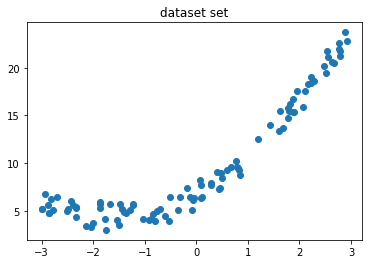

In [47]:
plt.scatter(X, y_noise)
plt.title('dataset set')
plt.show()

In [48]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y_noise)

print("w0: ", reg.intercept_)
print("w1: ", reg.coef_)

w0:  [9.86809285]
w1:  [[2.97610592]]


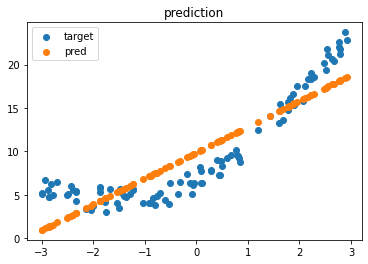

In [51]:
plt.figure()
plt.scatter(X, y_noise, label='target')
plt.scatter(X, reg.predict(X), label='pred')

plt.legend()
plt.title('prediction')
plt.show()

위의 예시에서 풀어왔던 Linear Regression 의 경우

$
\begin{align}
y_{1} = w_{1}x_{1} + w_{0}
\end{align}
$

(여기서 $w_{1}$ 은 reg.coef_ 이고 $w_{0}$ 은 reg.intercept_ 로 구했음) <br>
와 같은 간단한 직선 방정식의 형태를 가정하고 풀었던 과정이었다.
***
이것은 우리가 가지고 있는 X 의 feature 가 하나 밖에 있지 않았기 때문이다.<br>
하지만 X 의 feature 를 제곱, 세제곱의 형태로 임의로 늘려준다면 방정식은 1차원의 직선이 아닌, 아래와 같이 고차원의 식으로 변할 수 있다.

$
\begin{align}
y_{1} = w_{n}x_{1}^n + w_{n-1}x_{1}^{n-1} + ... + w_{2}x_{1}^2 + w_{1}x_{1}^1 + w_{0}
\end{align}
$

여기서<br>

${\phi}$ function 을 새로 정의하고 이것이 다음을 나타 낼 때,

$
\begin{align}
{\phi}_{n}(x) = x^n
\end{align}
$

주어진 식은 다음과 같이 다시 쓸 수 있다.<br>

$
\begin{align}
y_{1} = w_{n}{\phi}_{n}(x_{1}) + w_{n-1}{\phi}_{n-1}(x_{1}) + ... + w_{2}{\phi}_{2}(x_{1}) + w_{1}{\phi}_{1}(x_{1}) + w_{0}{\phi}_{0}(x_{1})
\end{align}
$
***
즉, 기존의 X 를 제곱, 세제곱의 형태를 만들어서 feature 를 추가해준다면, 좀 더 정확한 Model 을 얻게 될 것이다.

Library를 이용해서 feature를 추가해보자

Feature를 추가 할 때는 PolynomialFeature를 사용<br>
제곱, 세제곱 등의 계산이 가능

In [52]:
from sklearn.preprocessing import PolynomialFeatures

transform from {x} to {1, x, x^2} ## default <br>
transform from {x} to {x, x^2} ## include_bias = False

In [53]:
polynomial = PolynomialFeatures(degree=2, include_bias=False)
new_feature = polynomial.fit_transform(X)

In [54]:
print("기존의 x[0]: ", X[0])
print("Feature가 추가된 x[0]: ", new_feature[0])

기존의 x[0]:  [-1.66804097]
Feature가 추가된 x[0]:  [-1.66804097  2.78236069]


Feature를 추가한 상태에서 LinearRegression을 다시 사용

In [55]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(new_feature, y_noise)

print("w0: ", reg.intercept_)
print("w1: ", reg.coef_)

w0:  [6.82439098]
w1:  [[3.02103818 0.92278965]]


$$ {y = x^2 + 3x + 5} $$
$$ {y = 0.92x^2 + 3.02x + 6.82} $$

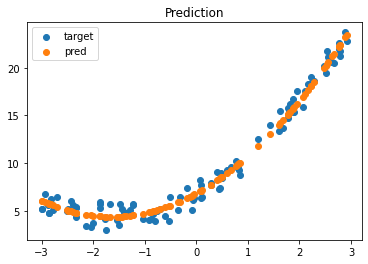

In [57]:
plt.figure()
plt.scatter(X, y_noise, label='target')
plt.scatter(X, reg.predict(new_feature), label='pred')

plt.legend()
plt.title('Prediction')
plt.show()

# Polynomial Regression

x의 범위는 -2 ~ 2


$$ {y = 3x^3 + 2x^2 + 7x + 5} $$

In [59]:
np.random.seed(10)

N=100
X = 4*np.random.rand(N,1)-2 # -2 ~ 2로 범위를 만들기 위해 -2를 끝에 붙임
y = 3*X**3 + 2*X**2 + 7*X + 5

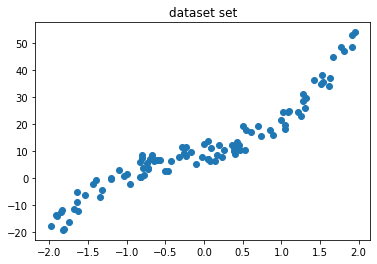

In [60]:
plt.scatter(X, y_noise)
plt.title('dataset set')
plt.show()

In [65]:
polynomial = PolynomialFeatures(degree=3, include_bias=False)
new_feature2 = polynomial.fit_transform(X)

print("기존의 x[0]: ", X[0])
print("Feature가 추가된 x[0]: ", new_feature2[0])

기존의 x[0]:  [1.08528257]
Feature가 추가된 x[0]:  [1.08528257 1.17783826 1.27828734]


In [63]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(new_feature2, y_noise)

print("w0: ", reg.intercept_)
print("w1: ", reg.coef_)

w0:  [9.18157997]
w1:  [[6.35064075 2.3300474  3.20666863]]


$$ {y = 3x^3 + 2x^2 + 7x + 1} $$
$$ {y = 3.20x^3 + 2.33x^2 + 6.35x + 9.18} $$

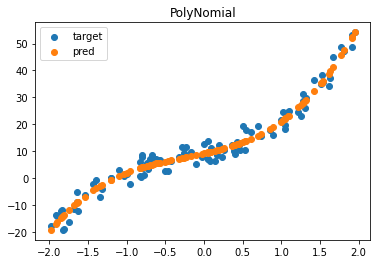

In [66]:
plt.figure()
plt.scatter(X, y_noise, label='target')
plt.scatter(X, reg.predict(new_feature2), label='pred')

plt.legend()
plt.title('PolyNomial')
plt.show()

# 앞서 했던 sin 함수를 1차 그래프가 아닌 다차원 그래프로 정확한 예측을 해보자

In [67]:
N = 100

X = np.linspace(0,2*np.pi, N).reshape(N,1)

y = np.sin(X)

y += 0.3*np.random.rand(N,1)


In [68]:
polynomial = PolynomialFeatures(degree=3, include_bias=False)
sin_new_feature = polynomial.fit_transform(X)

In [69]:
print("기존의 x[0]:",X[1])
print("Feature가 추가된 x[0]:", sin_new_feature[1])

기존의 x[0]: [0.06346652]
Feature가 추가된 x[0]: [0.06346652 0.004028   0.00025564]


Shuffle & Split train, test

In [71]:
# shuffle data
idx = np.random.permutation(N)

shuffle_X = sin_new_feature[idx]
shuffle_y = y[idx]

In [72]:
n = int(N * (3/4))

# train_data
X_train = shuffle_X[:n]
y_train = shuffle_y[:n]

# test data
X_test = shuffle_X[n:]
y_test = shuffle_y[n:]

## Perform Linear Regression

In [74]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print("w0: ", reg.intercept_)
print("w: ", reg.coef_)

w0:  [0.0298004]
w:  [[ 1.80011276 -0.84081361  0.08937093]]


In [75]:
pred = reg.predict(X_train)

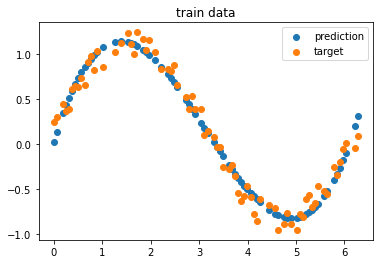

In [79]:
plt.figure()
plt.scatter(X_train[:,0], pred, label='prediction')
plt.scatter(X_train[:, 0], y_train, label='target')

plt.legend()
plt.title('train data')
plt.show()

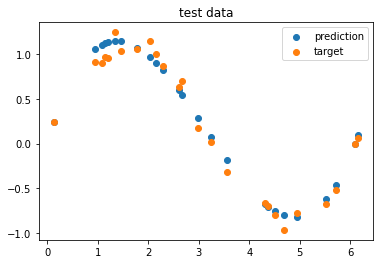

In [82]:
plt.figure()
plt.scatter(X_test[:,0], reg.predict(X_test), label='prediction')
plt.scatter(X_test[:, 0], y_test, label='target')

plt.legend()
plt.title('test data')
plt.show()

## Train, Test data로 plot

In [83]:
X_all = shuffle_X[:]
y_all = shuffle_y[:]

all_Pred = reg.predict(X_all)

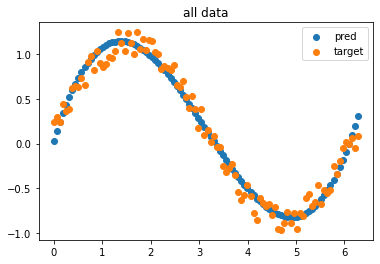

In [84]:
plt.figure()
plt.scatter(X_all[:,0], all_Pred, label='pred')
plt.scatter(X_all[:,0], y_all, label='target')
plt.legend()
plt.title('all data')
plt.show()